In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
df15 = pd.read_csv("../Dataset/16-02-2018.csv", low_memory = False)

In [3]:
df15 = df15.drop([0,1])

In [4]:
df15

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Pkt Len Min,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,56300000,138.5929291,56300000,56300000
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,56300000,263.7508294,56300000,56300000
4,0,0,0,0,0,0,0,0,0,1,...,22,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,56300000,82.02438662,56300000,56300000
6,0,0,0,0,0,0,0,0,0,1,...,0,20,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,0,0,0,0,0,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,0
1048572,0,0,0,0,0,0,0,0,1,0,...,0,40,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,0,0,0,0,1,...,0,40,0,0,0,0,0,0,0,0
1048574,0,0,0,0,0,0,0,0,0,1,...,0,40,0,0,0,0,0,0,0,0


In [5]:
df16Aux = pd.read_csv("../Dataset/15-02-2018.csv", low_memory = False)

In [6]:
df16Aux = df16Aux.drop([0,1])

In [7]:
df16Aux

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0.0,0,0.0,0,112641158.0,0,3.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320579.0,704.2783540618,56321077.0,56320081.0
3,22.0,0,6.0,0,37366762.0,0,14.0,0,12.0,0,...,8.0,32.0,1024353.0,649038.754494676,1601183.0,321569.0,11431221.0,3644990.55984457,15617415.0,8960247.0
4,47514.0,1,6.0,0,543.0,0,2.0,0,0.0,0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0,0.0,0,112640703.0,0,3.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320351.5,366.9884194358,56320611.0,56320092.0
6,0.0,0,0.0,0,112640874.0,0,3.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320437.0,719.8347032479,56320946.0,56319928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040545,50111.0,0,6.0,0,22.0,0,3.0,0,0.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040546,443.0,1,6.0,0,54682783.0,0,5.0,0,1.0,0,...,2.0,20.0,158783.0,0.0,158783.0,158783.0,54523813.0,0.0,54523813.0,54523813.0
1040547,443.0,1,6.0,0,53682093.0,0,5.0,0,1.0,0,...,2.0,20.0,259719.0,0.0,259719.0,259719.0,53421756.0,0.0,53421756.0,53421756.0
1040548,443.0,1,6.0,0,54683364.0,0,5.0,0,1.0,0,...,2.0,20.0,158870.0,0.0,158870.0,158870.0,54523593.0,0.0,54523593.0,54523593.0


In [8]:
listOrd = df15.columns.tolist()

In [9]:
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [10]:
df16

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Pkt Len Min,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320579.0,704.2783540618,56321077.0,56320081.0
3,0,0,0,0,0.0,0,0,0,1,0,...,8.0,32.0,1024353.0,649038.754494676,1601183.0,321569.0,11431221.0,3644990.55984457,15617415.0,8960247.0
4,1,0,0,0,0.0,0,1,0,0,1,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320351.5,366.9884194358,56320611.0,56320092.0
6,0,0,0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,56320437.0,719.8347032479,56320946.0,56319928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040545,0,0,0,0,0.0,0,0,0,0,1,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040546,1,0,0,0,0.0,0,1,0,0,1,...,2.0,20.0,158783.0,0.0,158783.0,158783.0,54523813.0,0.0,54523813.0,54523813.0
1040547,1,0,0,0,0.0,0,1,0,0,1,...,2.0,20.0,259719.0,0.0,259719.0,259719.0,53421756.0,0.0,53421756.0,53421756.0
1040548,1,0,0,0,0.0,0,1,0,0,1,...,2.0,20.0,158870.0,0.0,158870.0,158870.0,54523593.0,0.0,54523593.0,54523593.0


In [11]:
df16Aux = None

In [12]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)

In [13]:
output_label15 = np.array(df15["Label"])

In [14]:
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15 = out

In [15]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)

In [16]:
output_label16 = np.array(df16["Label"])

In [17]:
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [18]:
dfAE = pd.concat([df15, df16])

In [19]:
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)

In [20]:
output_labelAE = np.array(dfAE["Label"])

In [21]:
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [22]:
dfAE = None
df15 = None
df16 = None

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

In [24]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)
input_label15, output_label15 = shuffle(input_label15, output_label15)
input_label16, output_label16 = shuffle(input_label16, output_label16)

## AutoEncoder

In [25]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [26]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [27]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [28]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [30]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47006/47006 [==============================] - 51s 1ms/step - loss: 0.0016 - accuracy: 0.8818 - val_loss: 0.0016 - val_accuracy: 0.8994
Epoch 2/10
47006/47006 [==============================] - 53s 1ms/step - loss: 0.0016 - accuracy: 0.8821 - val_loss: 0.0016 - val_accuracy: 0.8870
Epoch 3/10
47006/47006 [==============================] - 53s 1ms/step - loss: 0.0016 - accuracy: 0.8826 - val_loss: 0.0016 - val_accuracy: 0.8625
Epoch 4/10
47006/47006 [==============================] - 54s 1ms/step - loss: 0.0016 - accuracy: 0.8827 - val_loss: 0.0016 - val_accuracy: 0.8398
Epoch 5/10
47006/47006 [==============================] - 50s 1ms/step - loss: 0.0016 - accuracy: 0.8827 - val_loss: 0.0016 - val_accuracy: 0.89860016 - accurac - ETA: 33s - loss: 0.0016 - accuracy: 0. - ETA: 32s - loss: 0.0016 - accur - ETA: 32s - loss: 0.0016 - accur - ETA: 31s - loss: 0.0016 - accuracy - ETA: 31s - loss: 0.0016 - accuracy: 0.881 - ETA: 31s - loss: 0 - ETA: 29s - loss: 0. - ETA: 28s - loss:

In [31]:
predict = auto_encoder.predict(inp_test)

In [32]:
losses = keras.losses.mean_squared_error(out_test, predict).numpy()

In [33]:
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.0015792381272446213


In [34]:
input_labelAE = None
input_label15 = encoder.predict(input_label15).reshape(len(input_label15), 18, 1)
input_label16 = encoder.predict(input_label16).reshape(len(input_label16), 18, 1)

## Classificador

In [35]:
model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 2, activation = "softmax")
    ])

In [36]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [37]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
29492/29492 [==============================] - 39s 1ms/step - loss: 0.6826 - accuracy: 0.5730 - val_loss: 0.6826 - val_accuracy: 0.5733
Epoch 2/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6821 - accuracy: 0.5744 - val_loss: 0.6825 - val_accuracy: 0.5733
Epoch 3/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6825 - accuracy: 0.5730 - val_loss: 0.6824 - val_accuracy: 0.5733
Epoch 4/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6824 - accuracy: 0.5735 - val_loss: 0.6824 - val_accuracy: 0.5733
Epoch 5/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6823 - accuracy: 0.5737 - val_loss: 0.6824 - val_accuracy: 0.5733
Epoch 6/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6820 - accuracy: 0.5746 - val_loss: 0.6824 - val_accuracy: 0.5733
Epoch 7/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.6821 - accuracy: 0.5742 - val_loss: 0

In [38]:
res = [np.argmax(resu) for resu in model.predict(input_label16)]

In [39]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [40]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[     0 988050]
 [     0  52498]]


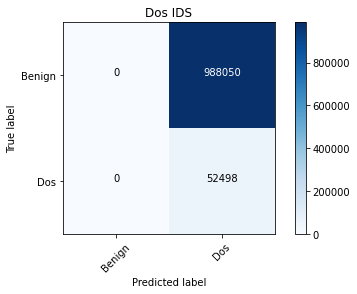

In [41]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [43]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

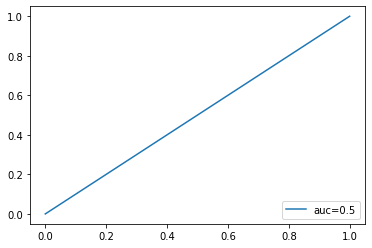

In [44]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()